# ML - 2 (Classification)
## Logistic Regression

Logistic Regression is a statistical method used in machine learning and statistics to model and predict the probability of a certain outcome. Despite its name, logistic regression is actually a classification algorithm, not a regression algorithm. It is used to solve binary classification problems (where the target variable has two possible outcomes, e.g., "yes" or "no," "0" or "1") and can be extended to multiclass classification.

#### Applications of Logistic Regression
* Binary Classification:
    * Email Spam Detection (Spam or Not Spam).
    * Disease Diagnosis (e.g., Cancer Detection: Malignant or Benign).
    * Customer Churn Prediction (Stay or Leave).
* Multiclass Classification (via Extensions):
    * Using techniques like One-vs-Rest (OvR) or Softmax Regression.

#### Sigmoid Function
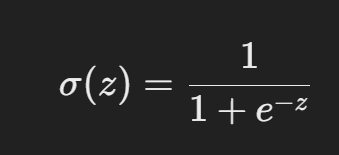


​


In [1]:
import pyforest

In [5]:
data = pd.DataFrame({'W': (62,58,78,75,92,55,90,97), 'HD': (0,0,0,1,1,0,1,1)})

data

<IPython.core.display.Javascript object>

,W,HD
0,62,0
1,58,0
2,78,0
3,75,1
4,92,1
5,55,0
6,90,1
7,97,1


<IPython.core.display.Javascript object>

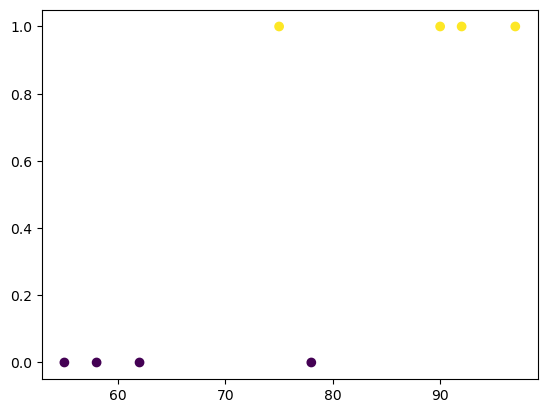

In [6]:
plt.scatter(data.W, data.HD, c=data.HD)

In [9]:
x = data.W
y = data.HD

b1 = np.sum((x - x.mean())* (y-y.mean())) / np.sum((x-x.mean())**2)
b0 = y.mean() - b1 * x.mean()
b1, b0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(0.027166969269047138, -1.5612937932889515)

In [10]:
y_reg = b1 * x + b0
print(y_reg)


0    0.123058
1    0.014390
2    0.557730
3    0.476229
4    0.938067
5   -0.067110
6    0.883733
7    1.073902
Name: W, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

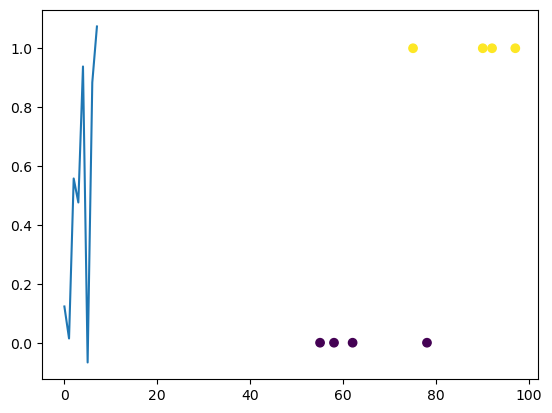

In [11]:
plt.scatter(data.W, data.HD, c=data.HD)
plt.plot(y_reg)

#### Admissions Data Set

In [12]:
admissions = pd.read_csv("Admission_Predict.csv")

admissions.head()

<IPython.core.display.Javascript object>

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [19]:
admissions = admissions.drop(columns="Serial No.")
admissions.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [20]:
admissions.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [21]:
out = admissions["Chance of Admit"]
inp = admissions.drop(columns='Chance of Admit')

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
inp_sc = sc.fit_transform(inp.iloc[:, :-1])
inp_sc = pd.DataFrame(inp_sc, columns=inp.columns[:-1])

inp_sc.head()

<IPython.core.display.Javascript object>

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029


In [23]:
inp_sc['Research'] = inp.Research
inp_sc.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,1
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,1
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,1
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,1
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,0


In [24]:
inp_sc.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,400.000000
mean,-4.174439e-16,5.595524e-16,7.105427e-17,7.993606e-17,-1.332268e-16,7.771561e-16,0.547500
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,0.498362
min,-2.339367e+00,-2.542098e+00,-1.827457e+00,-2.386613e+00,-2.733036e+00,-3.020504e+00,0.000000
25%,-7.685900e-01,-7.274920e-01,-9.520286e-01,-8.949798e-01,-5.042604e-01,-7.201909e-01,0.000000
50%,1.679859e-02,-6.763531e-02,-7.660001e-02,9.944220e-02,5.293342e-02,1.859559e-02,1.000000
75%,7.149218e-01,7.571856e-01,7.988286e-01,5.966532e-01,6.101273e-01,7.783704e-01,1.000000
max,2.023903e+00,2.076899e+00,1.674257e+00,1.591075e+00,1.724515e+00,2.218165e+00,1.000000


In [26]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(inp_sc.values, i ) for i in range(inp_sc.shape[1]) ]
vif["feature"] = inp_sc.columns

vif.sort_values("VIF", ascending=False )

<IPython.core.display.Javascript object>

,VIF,feature
5,5.205309,CGPA
0,4.358514,GRE Score
1,4.282118,TOEFL Score
3,3.063188,SOP
2,2.918556,University Rating
4,2.430409,LOR
6,1.189484,Research


In [27]:
inp_sc.shape

(400, 7)

In [28]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(inp_sc, out, test_size=0.2, random_state=10)

In [29]:
xtrainc = sm.add_constant(xtrain) # To Add B0 constant
mod_stat = sm.Logit(ytrain, xtrainc)

logit_mod = mod_stat.fit()
logit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.241326
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Chance of Admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      312
Method:                           MLE   Df Model:                            7
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                  0.6486
Time:                        12:40:41   Log-Likelihood:                -77.224
converged:                       True   LL-Null:                       -219.78
Covariance Type:            nonrobust   LLR p-value:                 9.137e-58
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.7119      0.330     -2.157      0.031      -1.359      -0.065
GRE Score             0.6095      0.447      1.365      0.172      -0.266       1.485
TOEFL Score           0.1989      0.403      0.493      0.622      -0.592       0.990
University Rating     0.5883      0.383      1.535      0.125      -0.163       1.339
SOP                   0.1768      0.374      0.473      0.636      -0.555       0.909
LOR                   0.5118      0.308      1.662      0.096      -0.092       1.115
CGPA                  2.6273      0.544      4.832      0.000       1.562       3.693
Research              0.5819      0.465      1.251      0.211      -0.329       1.493
=====================================================================================
"""

In [32]:
xtrain1 = xtrain.copy()

while(len(xtrain1.columns) > 0):
    xtrain1c = sm.add_constant(xtrain1)
    logit_mod = sm.Logit(ytrain,xtrain1c).fit()

    f = logit_mod.pvalues[1:].idxmax()
    if logit_mod.pvalues[1:].max() > 0.05:
        xtrain1 = xtrain1.drop(columns=f)
    else:
        break

print(xtrain1.columns)

Optimization terminated successfully.
         Current function value: 0.241326
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.241676
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.242082
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.244507
         Iterations 8
Index(['GRE Score', 'University Rating', 'LOR', 'CGPA'], dtype='object')


In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(xtrain, ytrain)

ypred = model.predict(xtest)

ypred

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [36]:
np.round(model.predict_proba(xtest), 3)[:5]

<IPython.core.display.Javascript object>

array([[0.934, 0.066],
       [0.205, 0.795],
       [0.978, 0.022],
       [0.999, 0.001],
       [0.997, 0.003]])